Problem : The goal of this project is to develop a machine learning model that can cluster shooting incidents in New York City based on relevant attributes such as occurrence date and time, location, demographic information etc. By identifying clusters of similar incidents, law enforcement agencies can better understand the underlying dynamics of gun violence and tailor their interventions accordingly.

In [148]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans,DBSCAN,HDBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import  adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [149]:
#Loading the dataset
df = pd.read_csv('./NYPD_Shooting_Incident_Data__Historic_.csv')

Data preprocessing and Exploratory data analysis

In [150]:
#Display first few rows of the dataset
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1058925.000,180924.0000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1005028.000,234516.0000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1007667.938,209836.5313,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10-09-2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1006537.375,244511.1406,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1024921.813,262189.4063,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [151]:
#Display row and column number
df.shape

(27312, 21)

In [152]:
#summary
df.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.731200e+04,27312.000000,27310.000000,2.731200e+04,27312.000000,27302.000000,27302.000000
mean,1.208605e+08,65.635362,0.326913,1.009449e+06,208127.401617,40.737892,-73.909051
std,7.341286e+07,27.305705,0.737743,1.837783e+04,31886.377756,0.087525,0.066272
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718800,40.511586,-74.249303
25%,6.386088e+07,44.000000,0.000000,1.000029e+06,182834.335950,40.668481,-73.943027
50%,9.037222e+07,68.000000,0.000000,1.007731e+06,194486.570300,40.700318,-73.915221
75%,1.888102e+08,81.000000,0.000000,1.016838e+06,239518.468800,40.824067,-73.882330
max,2.611902e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


In [153]:
#Making a copy of the dataset
df1 = df.copy(deep = True)

In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [155]:
#Checking for missing values
df1.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

In [156]:
#Checking for any duplicates
df1.duplicated().sum()

0

In [157]:
#Displaying all the column names
df1.columns.values

array(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO',
       'LOC_OF_OCCUR_DESC', 'PRECINCT', 'JURISDICTION_CODE',
       'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP',
       'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lon_Lat'], dtype=object)

In [158]:
#Dropping all the unnecessary columns
df1= df1.drop(['INCIDENT_KEY','PRECINCT','LOC_OF_OCCUR_DESC','LOC_CLASSFCTN_DESC','LOCATION_DESC','JURISDICTION_CODE','PERP_AGE_GROUP','PERP_SEX','PERP_RACE','X_COORD_CD','Y_COORD_CD','Longitude','Lon_Lat'],axis=1)

In [159]:
#filling missing column with mean
categoricals12 = ['Latitude']

for column in categoricals12:
    # Fill with the mean value
    df1[column] = df1[column].fillna(df1[column].mean())

In [160]:
#Convert 'Datetime' column to datetime type


def correct_date_format(date_str):
    # Try the common format first
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y')
    except ValueError:
        # If that fails, try the alternate format
        return pd.to_datetime(date_str, format='%m/%d/%Y')

# Apply the correction function to each date
df1['OCCUR_DATE'] = df1['OCCUR_DATE'].apply(correct_date_format)
df1['OCCUR_TIME'] = pd.to_datetime(df1['OCCUR_TIME'])




In [161]:
# Display# Extract components
df1['year'] = df1['OCCUR_DATE'].dt.year
df1['month'] = df1['OCCUR_DATE'].dt.month
df1['day'] = df1['OCCUR_DATE'].dt.day
df1['hour'] = df1['OCCUR_TIME'].dt.hour
df1['minute'] = df1['OCCUR_TIME'].dt.minute
df1['second'] = df1['OCCUR_TIME'].dt.second

# Drop the original datetime column
df1 = df1.drop(columns=['OCCUR_DATE'])
df1 = df1.drop(columns=['OCCUR_TIME'])
#drop the first few rows of the preprocessed dataset
df1.head()

,BORO,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,year,month,day,hour,minute,second
0,QUEENS,False,18-24,M,BLACK,40.662965,2021,5,27,21,30,0
1,BRONX,False,18-24,M,BLACK,40.810352,2014,6,27,17,40,0
2,QUEENS,True,25-44,M,WHITE,40.742607,2015,11,21,3,56,0
3,BRONX,False,<18,M,WHITE HISPANIC,40.837782,2015,9,10,18,30,0
4,BRONX,True,45-64,M,BLACK,40.886238,2009,2,19,22,58,0


In [162]:
#Again checking for missing values
df1.isnull().sum()

BORO                       0
STATISTICAL_MURDER_FLAG    0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
Latitude                   0
year                       0
month                      0
day                        0
hour                       0
minute                     0
second                     0
dtype: int64

In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BORO                     27312 non-null  object 
 1   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 2   VIC_AGE_GROUP            27312 non-null  object 
 3   VIC_SEX                  27312 non-null  object 
 4   VIC_RACE                 27312 non-null  object 
 5   Latitude                 27312 non-null  float64
 6   year                     27312 non-null  int32  
 7   month                    27312 non-null  int32  
 8   day                      27312 non-null  int32  
 9   hour                     27312 non-null  int32  
 10  minute                   27312 non-null  int32  
 11  second                   27312 non-null  int32  
dtypes: bool(1), float64(1), int32(6), object(4)
memory usage: 1.7+ MB


In [164]:
df1.isnull().sum()

BORO                       0
STATISTICAL_MURDER_FLAG    0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
Latitude                   0
year                       0
month                      0
day                        0
hour                       0
minute                     0
second                     0
dtype: int64

Key findings: There is no presence of duplicates.
It shows the presence of missing values in the dataset,which is replaced with appropriate methods like mean and mode.
It also shows the presence of outliers,through the box plot method.

EXPLORATORY DATA ANALYSIS

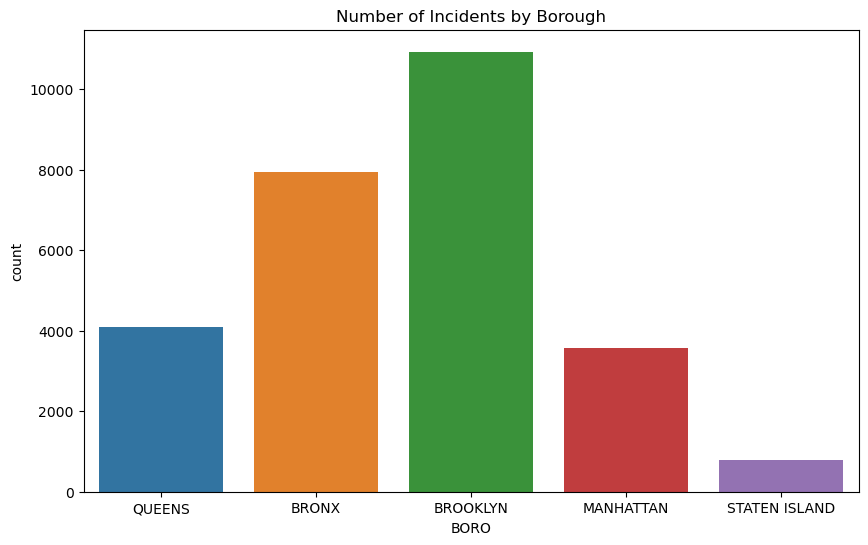

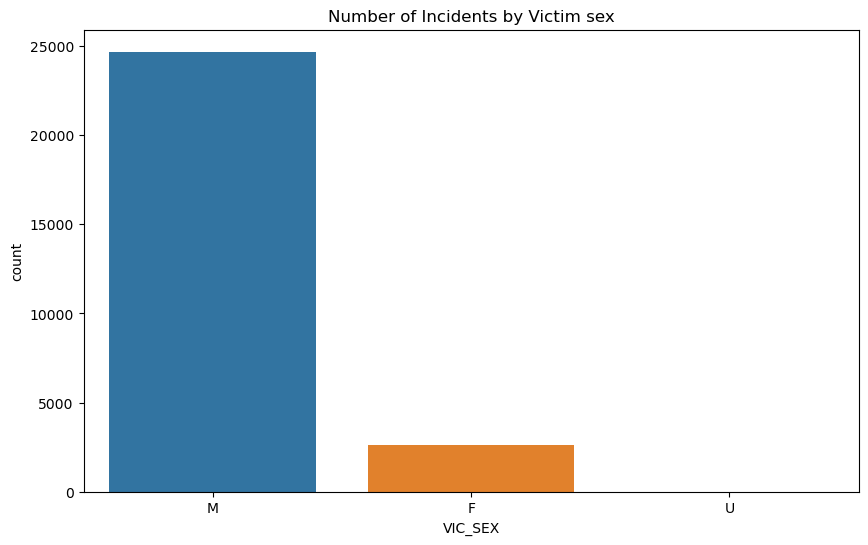

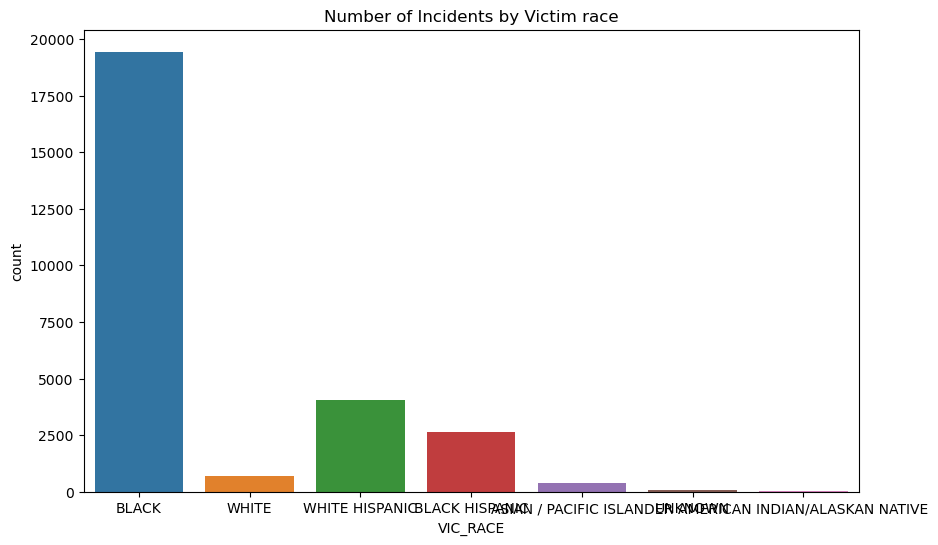

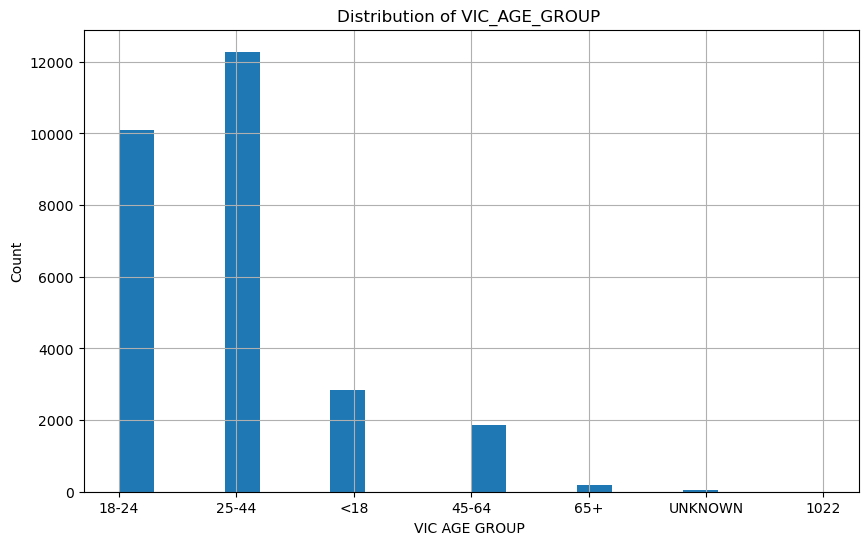

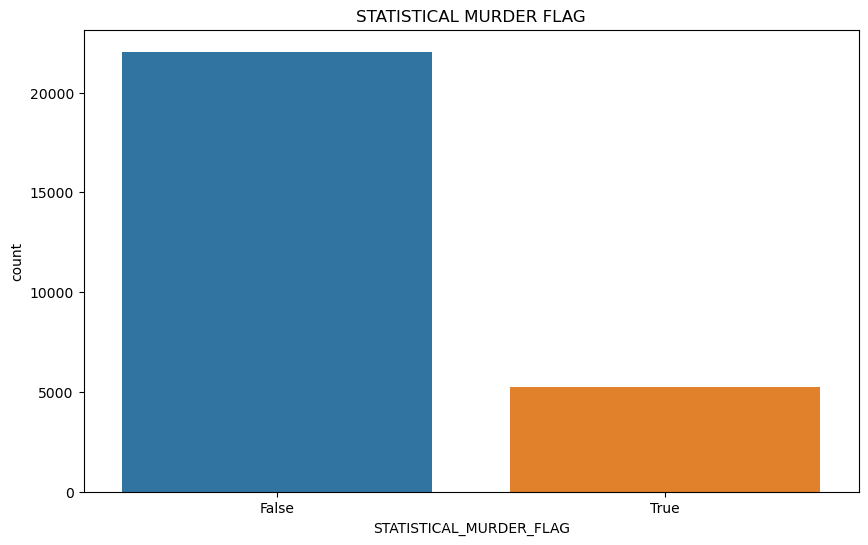

In [165]:
# Univariate analysis for categorical column: 'BORO'
plt.figure(figsize=(10, 6))
sns.countplot(x='BORO', data=df1)
plt.title('Number of Incidents by Borough')
plt.show()


# Univariate analysis for categorical column: 'Victim sex'
plt.figure(figsize=(10, 6))
sns.countplot(x='VIC_SEX', data=df1)
plt.title('Number of Incidents by Victim sex')
plt.show()

# Univariate analysis for categorical column: 'Victim race'
plt.figure(figsize=(10, 6))
sns.countplot(x='VIC_RACE', data=df1)
plt.title('Number of Incidents by Victim race')
plt.show()

# Histogram for numerical column: 'Victim age group'
plt.figure(figsize=(10, 6))
df1['VIC_AGE_GROUP'].hist(bins=20)
plt.title('Distribution of VIC_AGE_GROUP ')
plt.xlabel('VIC AGE GROUP ')
plt.ylabel('Count')
plt.show()

# Univariate analysis for categorical column: 'Statistical murder flag'
plt.figure(figsize=(10, 6))
sns.countplot(x='STATISTICAL_MURDER_FLAG', data=df1)
plt.title('STATISTICAL MURDER FLAG')
plt.show()


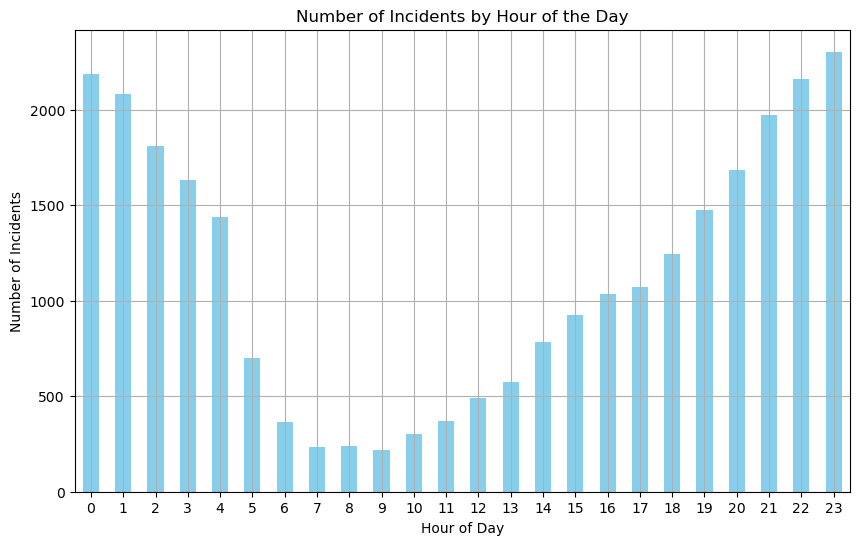

In [166]:
# Plot the distribution of incidents by hour
plt.figure(figsize=(10, 6))
df1['hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

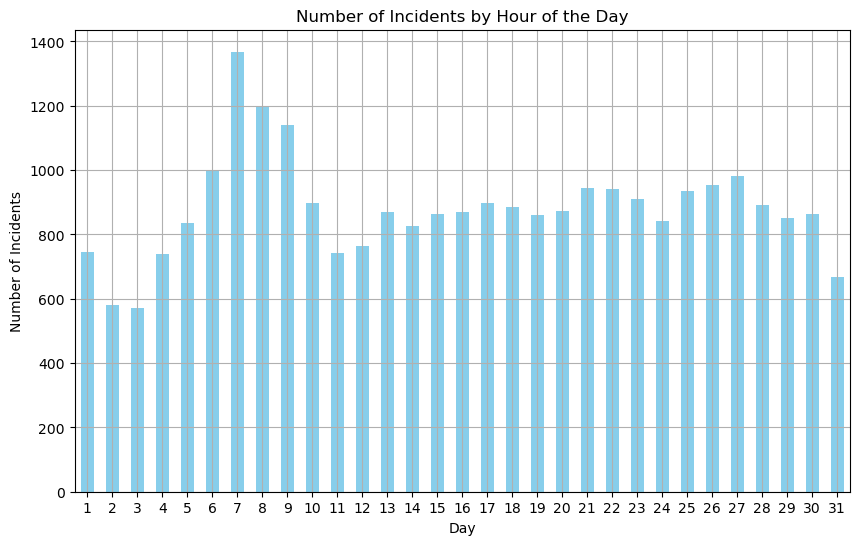

In [167]:
# Plot the distribution of incidents by day
plt.figure(figsize=(10, 6))
df1['day'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by Day')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

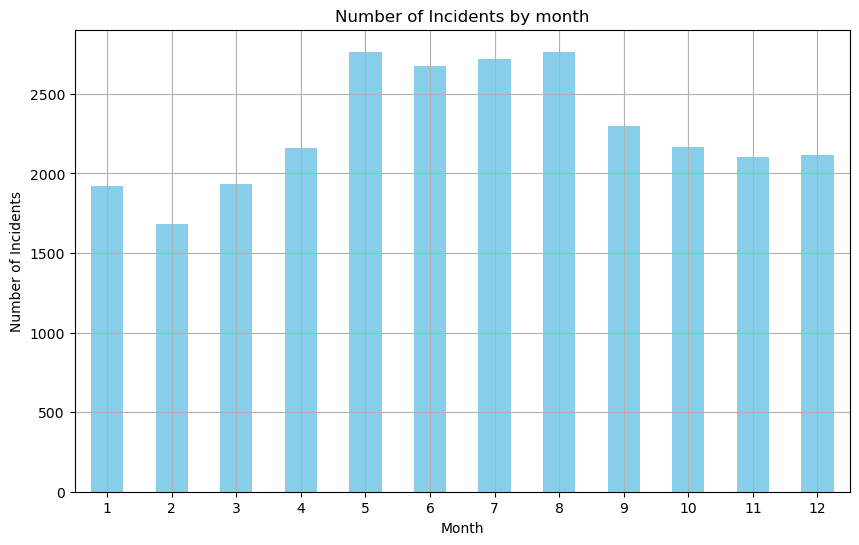

In [168]:
# Plot the distribution of incidents by month
plt.figure(figsize=(10, 6))
df1['month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

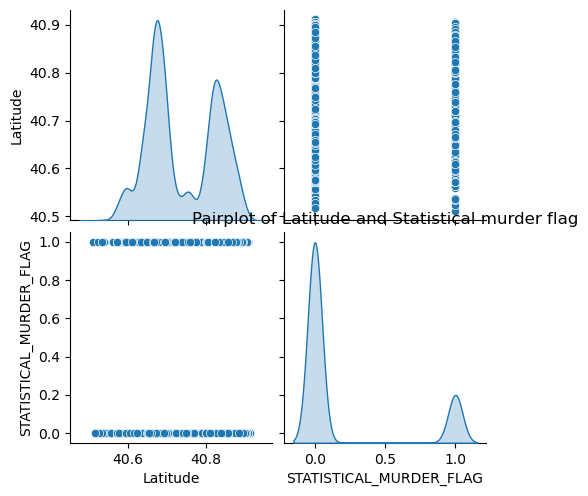

In [169]:
# Pairplot for selected numerical columns
plt.figure(figsize=(10, 6))
sns.pairplot(df1[['Latitude','STATISTICAL_MURDER_FLAG']], diag_kind='kde')
plt.title('Pairplot of Latitude and Statistical murder flag')
plt.show()


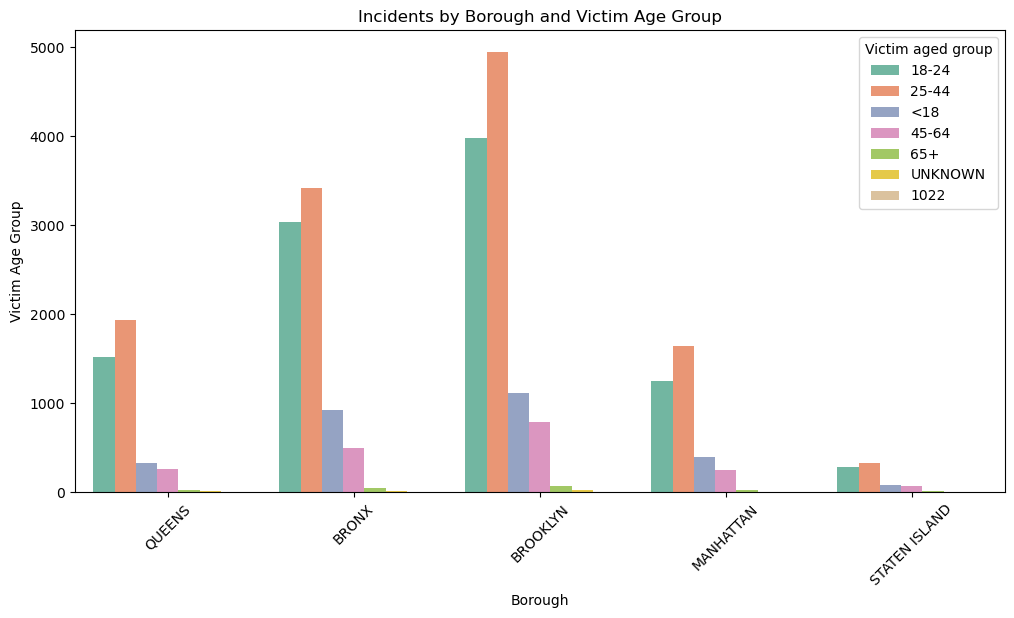

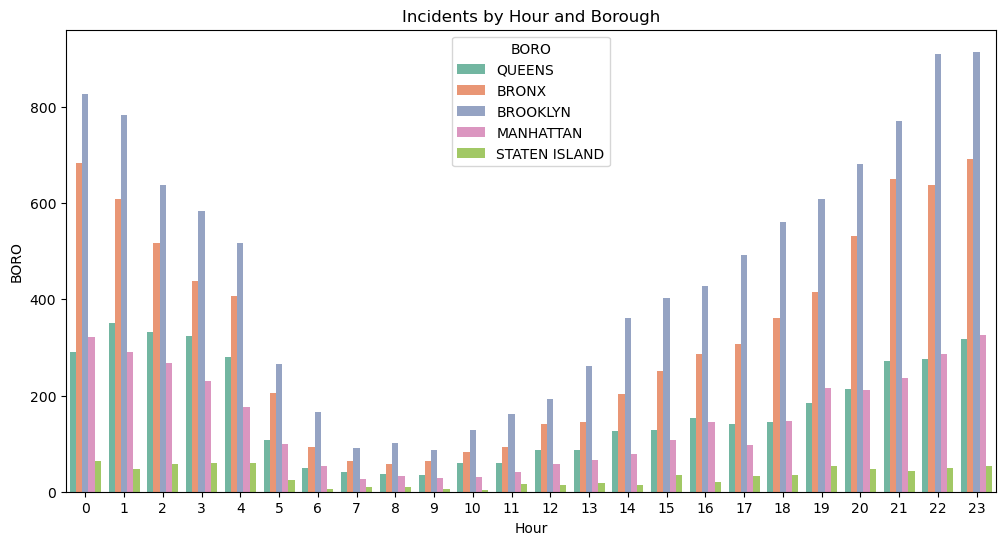

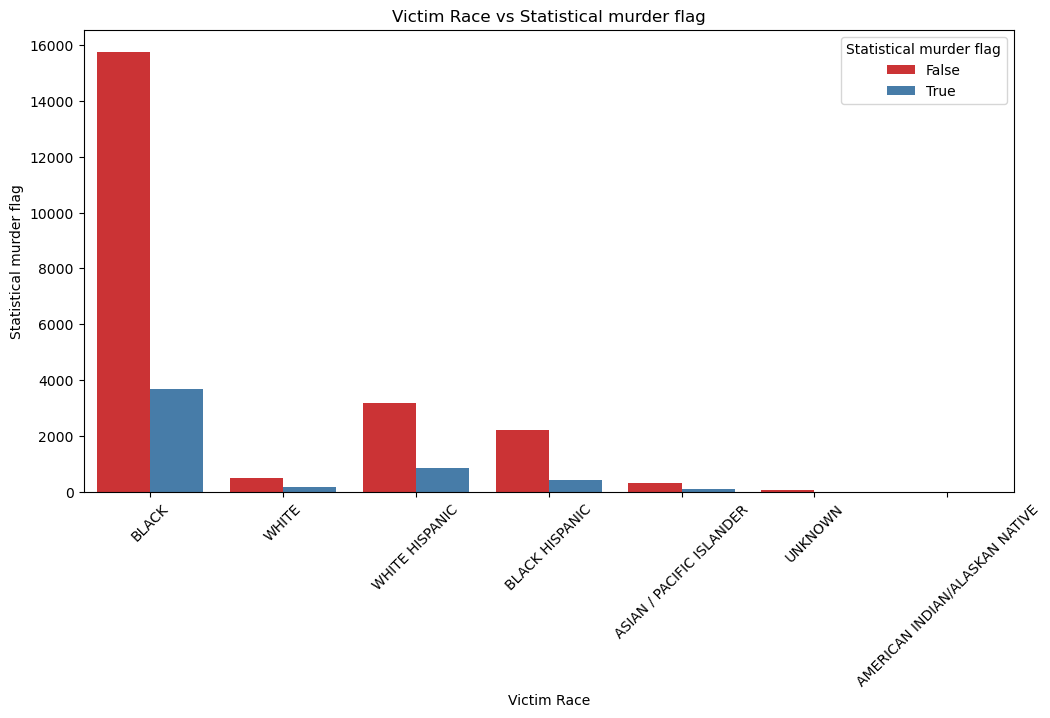

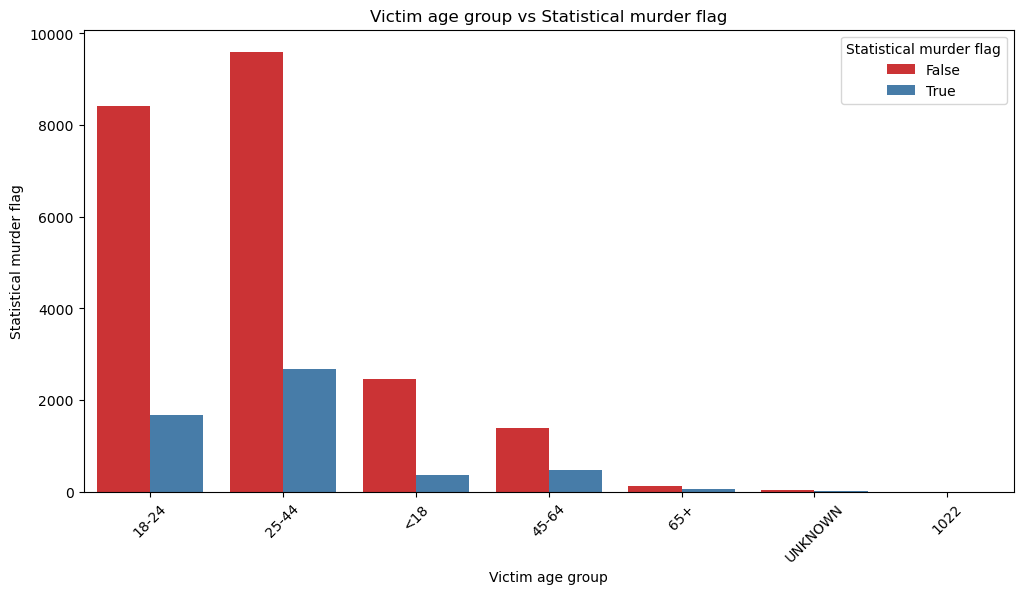

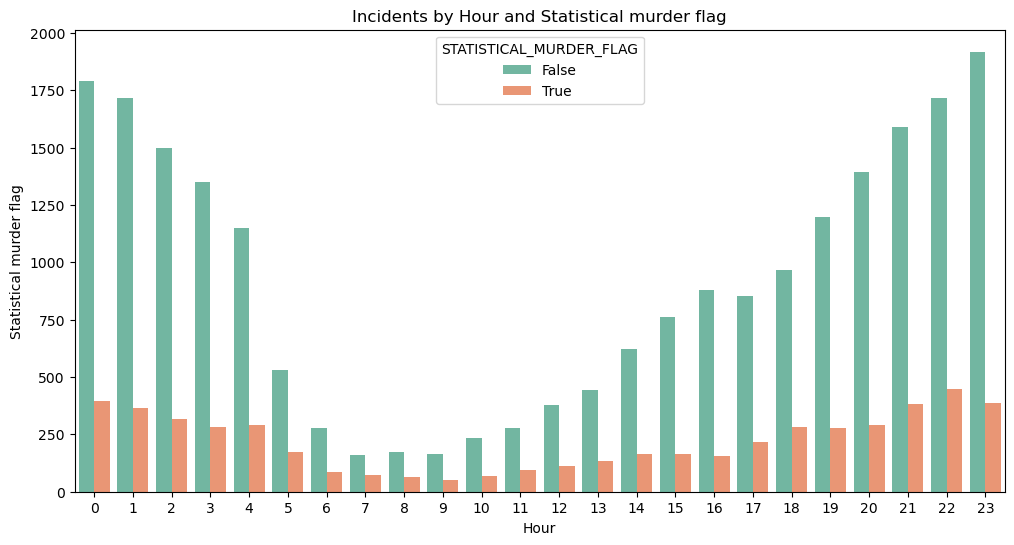

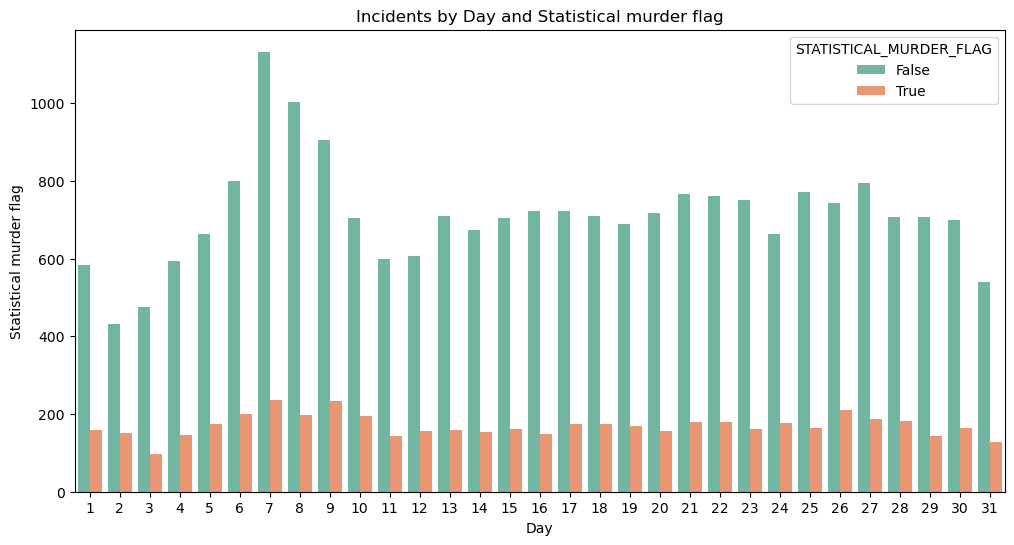

In [170]:
# Bivariate Analysis 1: Borough vs Victim's Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='BORO', hue='VIC_AGE_GROUP', palette='Set2')
plt.title('Incidents by Borough and Victim Age Group')
plt.xlabel('Borough')
plt.ylabel('Victim Age Group')
plt.xticks(rotation=45)
plt.legend(title='Victim aged group')
plt.show()

# Bivariate Analysis 2: Time (Hour) vs Borough
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='hour', hue='BORO', palette='Set2')
plt.title('Incidents by Hour and Borough')
plt.xlabel('Hour')
plt.ylabel('BORO')
plt.show()

# Bivariate Analysis 3: Victim's Race vs Statistical murder flag
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='VIC_RACE', hue='STATISTICAL_MURDER_FLAG', palette='Set1')
plt.title('Victim Race vs Statistical murder flag')
plt.xlabel('Victim Race')
plt.ylabel('Statistical murder flag')
plt.xticks(rotation=45)
plt.legend(title='Statistical murder flag')
plt.show()

# Bivariate Analysis 4: Victim's Race vs Statistical murder flag
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='VIC_AGE_GROUP', hue='STATISTICAL_MURDER_FLAG', palette='Set1')
plt.title('Victim age group vs Statistical murder flag')
plt.xlabel('Victim age group')
plt.ylabel('Statistical murder flag')
plt.xticks(rotation=45)
plt.legend(title='Statistical murder flag')
plt.show()

# Bivariate Analysis 5: Time (Hour) vs Statistical murder flag
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='hour', hue='STATISTICAL_MURDER_FLAG', palette='Set2')
plt.title('Incidents by Hour and Statistical murder flag')
plt.xlabel('Hour')
plt.ylabel('Statistical murder flag')
plt.show()

# Bivariate Analysis 6: Day vs Statistical murder flag
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='day', hue='STATISTICAL_MURDER_FLAG', palette='Set2')
plt.title('Incidents by Day and Statistical murder flag')
plt.xlabel('Day')
plt.ylabel('Statistical murder flag')
plt.show()



plt.show()


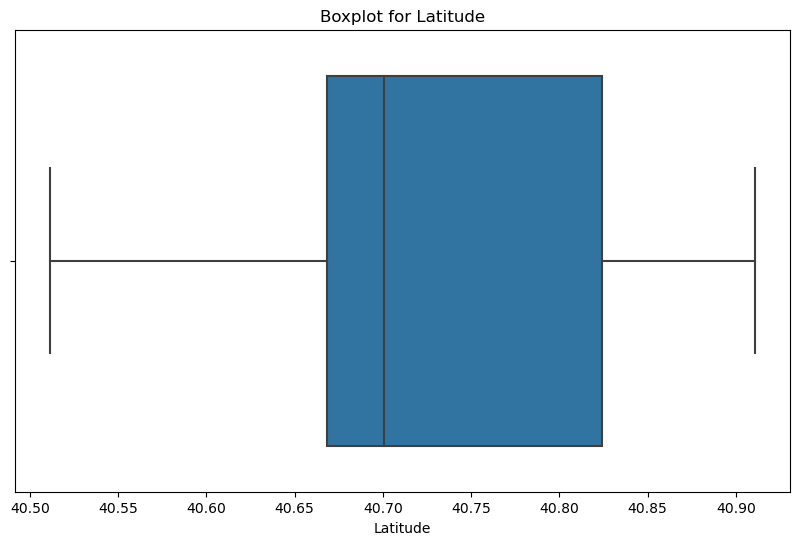

In [171]:
# Boxplot to detect outliers for 'Latitude'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Latitude'])
plt.title('Boxplot for Latitude')
plt.show()


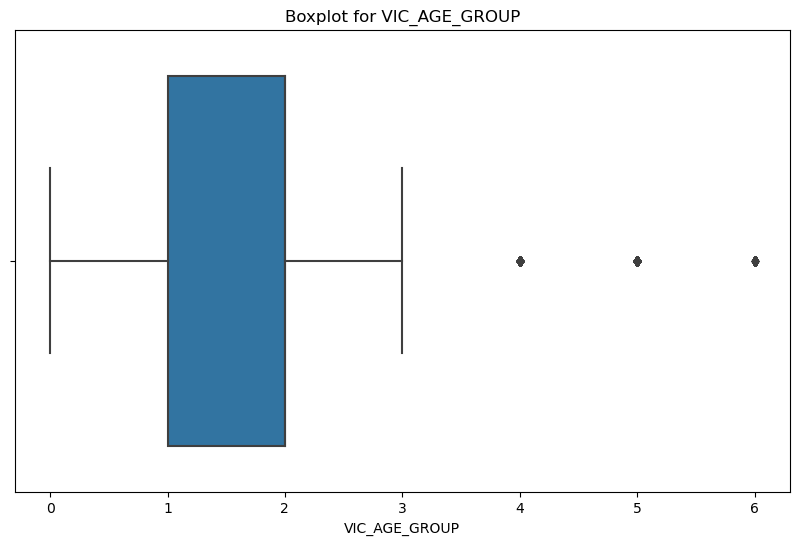

In [175]:
# Boxplot to detect outliers for 'VIC_AGE_GROUP'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['VIC_AGE_GROUP'])
plt.title('Boxplot for VIC_AGE_GROUP')
plt.show()

In [176]:
# Encode categorical variables using LabelEncoder
categorical_cols = ['BORO','STATISTICAL_MURDER_FLAG','VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE']
le = LabelEncoder()
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])

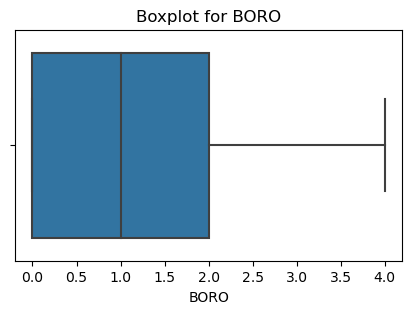

In [177]:
# Boxplot to detect outliers for 'BORO'
plt.figure(figsize=(5,3))
sns.boxplot(x=df1['BORO'])
plt.title('Boxplot for BORO')
plt.show()

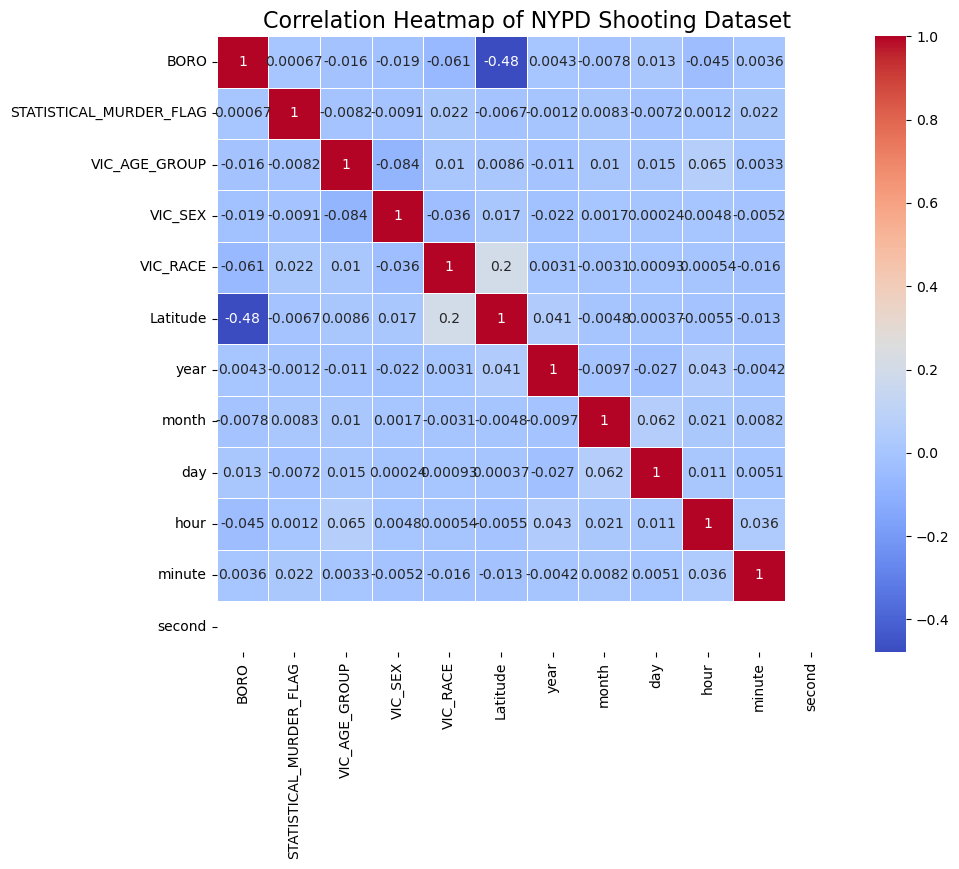

In [178]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding title
plt.title('Correlation Heatmap of NYPD Shooting Dataset', fontsize=16)

# Show the plot
plt.show()

Key findings : Univariate  analysis shows that BROOKLYN BORO shows the highest frequency in the dataset.
In Victim sex,male shows the highest count and in victim race, Black shows the highest.When comparing the victim age group 25-44 age group shows the highest.When analyzing the date and time,11 pm shows highest frequency in shooting incidents and 10 pm shows highest murder rate.7 th day and 5 th month(may and aug) shows the highest shooting incidents.

MACHINE LEARNING DEVELOPMERNT MODEL

In [179]:
# Standardize the features
scaler = StandardScaler()
Df12 = scaler.fit_transform(df1)

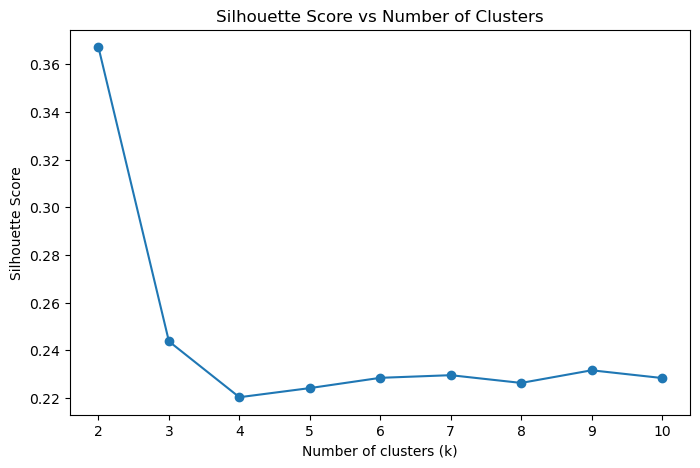

In [180]:
# Range of k values to try
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [ ]:
# Define a custom scoring function using silhouette score
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

# Define the hyperparameters grid to search
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7],
    'init': ['k-means++', 'random'],
    'max_iter': [50,100, 300, 500],
    'n_init': [10, 20, 30],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Create the KMeans model
kmeans = KMeans(random_state=42)

# Setup the grid search
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid,
                           scoring=make_scorer(silhouette_scorer), cv=3)

# Perform the grid search
grid_search.fit(df1)

# Output the best parameters
print("Best Parameters: ", grid_search.best_params_)


In [182]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
df12 = pca.fit_transform(df1) #fitting to the model


1.KMeans Clustering

In [183]:
# Apply KMeans with the best parameters
kmeans = KMeans(
    n_clusters=2,        # Best number of clusters
    init='k-means++',     # Best initialization method
    max_iter=10,         # Maximum iterations
    n_init=5,            # Number of times to run the algorithm with different centroid seeds
    tol=0.001,           # Convergence tolerance
    random_state=42       # Set random state for reproducibility
)


# Fit the model to the scaled data
kmeans.fit(df12)
df1['Cluster'] = kmeans.fit_predict(df12)

# Step 6: Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df12, df1['Cluster'])
print(f'Silhouette Score for {2} clusters: {silhouette_avg}')

Silhouette Score for 2 clusters: 0.4826590411792011


2.DBSCAN Clustering

In [184]:
# Sample DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(df1)
df1['DBSCAN_Cluster'] = dbscan_labels

# Define the check_stability function
def check_stability(model, data):
    """
    Function to check the stability of a clustering model.
    It returns the silhouette score and Adjusted Rand Index (ARI),
    while filtering out the noise points (-1).
    """
    # Filter out the noise points (those labeled as -1)
    clustered_data = data[data['DBSCAN_Cluster'] != -1]

    # Check if there are still points left after filtering out noise
    if len(clustered_data) == 0:
        print("All points are noise. Stability cannot be calculated.")
        return -1, -1

    # Extract feature data (excluding cluster labels)
    features = clustered_data.drop(columns=['DBSCAN_Cluster'])
    labels = clustered_data['DBSCAN_Cluster']

    # Silhouette Score (only calculate if there are at least 2 clusters)
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(features, labels)
    else:
        silhouette_avg = -1  # Invalid score, less than 2 clusters

    # Adjusted Rand Index (ARI) between original and a second DBSCAN run
    second_dbscan = DBSCAN(eps=1.5, min_samples=4).fit(features)
    ari_score = adjusted_rand_score(labels, second_dbscan.labels_)

    return silhouette_avg, ari_score

# Call check_stability to calculate the silhouette score and ARI
dbscan_silhouette, dbscan_ari = check_stability(dbscan, df1)

# Print the results
print(f'DBSCAN Stability (Silhouette Score): {dbscan_silhouette}')
print(f'DBSCAN Stability (Adjusted Rand Index): {dbscan_ari}')


DBSCAN Stability (Silhouette Score): 1.0
DBSCAN Stability (Adjusted Rand Index): 1.0


In [ ]:
# --- Visualization ---

# Set up a matplotlib figure
plt.figure(figsize=(14, 6))

# Subplot for KMeans
plt.subplot(1, 2, 1)
# Changed 'KMeans_Cluster' to 'Cluster' to reflect column name in df12
sns.scatterplot(x='BORO', y='Latitude', hue='Cluster', palette='tab10', data=df1, legend='full')
plt.title('KMeans Clustering (NYPD Dataset)')
plt.xlabel('BORO')
plt.ylabel('Latitude')


# Subplot for DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x='BORO', y='Latitude', hue='DBSCAN_Cluster', palette='tab10', data=df1, legend='full')
plt.title('DBSCAN Clustering (NYPD Dataset)')
plt.xlabel('BORO')
plt.ylabel('Latitude')

# Display the plots
plt.tight_layout()
plt.show()


Interpretation : Machine learning development model was build using KMeans clustering and DBSCAN.DBSCAN shows good result with Silhouette score and Adjusted Rand index score of 1,which shows its effectiveness in clustering shooting incidents in New York city.Visualization of the above was also given.PCA(Principal component analysis) was also done to increase its efficiency.Along with this,GridSearch CV was used to get the best parameters for the model.Both DBSCAN and K-means clustering are unsupervised machine learning algorithm.